In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
from lstm_model import build_model, train_model
import matplotlib.pyplot as plt
from models.lstm.lstm_normalize import get_lstm_data

---

## For **build_model** function

In [3]:
model = build_model()

---

## For **train_model** function

In [4]:
x_train, x_test, y_train, y_test, dates_train, dates_test = get_lstm_data()

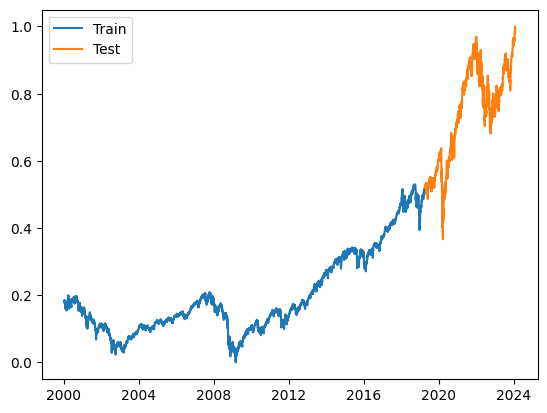

In [16]:
# plt.plot(dates_train, x_train)
plt.plot(dates_train, y_train)
plt.plot(dates_test, y_test)
plt.legend(['Train', 'Test'])

Epoch 1/100


152/152 [==============================] - 3s 5ms/step - loss: 0.0035 - mean_absolute_error: 0.0268 - val_loss: 0.0013 - val_mean_absolute_error: 0.0292
Epoch 2/100
152/152 [==============================] - 0s 3ms/step - loss: 3.2272e-05 - mean_absolute_error: 0.0042 - val_loss: 0.0016 - val_mean_absolute_error: 0.0328
Epoch 3/100
152/152 [==============================] - 0s 3ms/step - loss: 3.2040e-05 - mean_absolute_error: 0.0041 - val_loss: 7.7401e-04 - val_mean_absolute_error: 0.0218
Epoch 4/100
152/152 [==============================] - 0s 3ms/step - loss: 2.9832e-05 - mean_absolute_error: 0.0040 - val_loss: 8.8018e-04 - val_mean_absolute_error: 0.0239
Epoch 5/100
152/152 [==============================] - 0s 3ms/step - loss: 3.1464e-05 - mean_absolute_error: 0.0041 - val_loss: 3.8506e-04 - val_mean_absolute_error: 0.0148
Epoch 6/100
152/152 [==============================] - 0s 3ms/step - loss: 3.1498e-05 - mean_absolute_error: 0.0041 - val_loss: 3.8303e-04 - val_

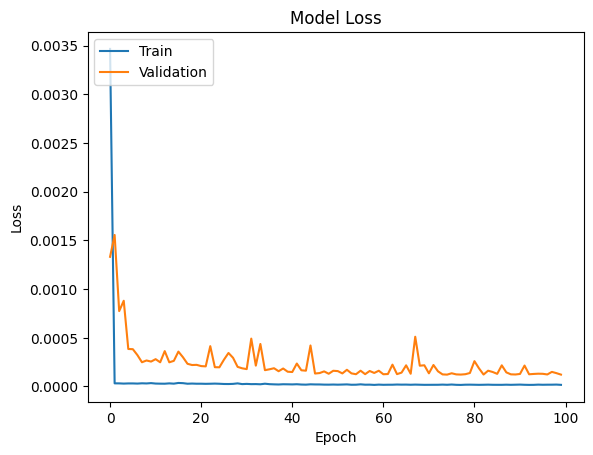

In [5]:
history = train_model(x_train, x_test, y_train, y_test)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 20065 (78.38 KB)
Trainable params: 20065 (78.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
predictions = model.predict(x_test).flatten()

38/38 [==============================] - 0s 1ms/step


In [7]:
predictions.shape

(1211,)

In [8]:
predictions[0]

-0.0070404774

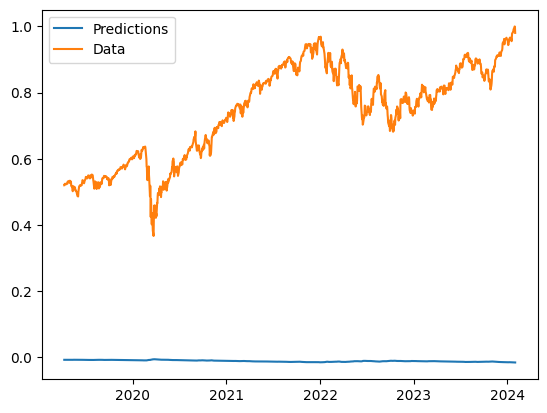

In [9]:
predictions

plt.plot(dates_test, predictions)
plt.plot(dates_test, y_test)
plt.legend(['Predictions', 'Data'])

In [10]:
predictions_train = model.predict(x_train).flatten()

152/152 [==============================] - 0s 1ms/step


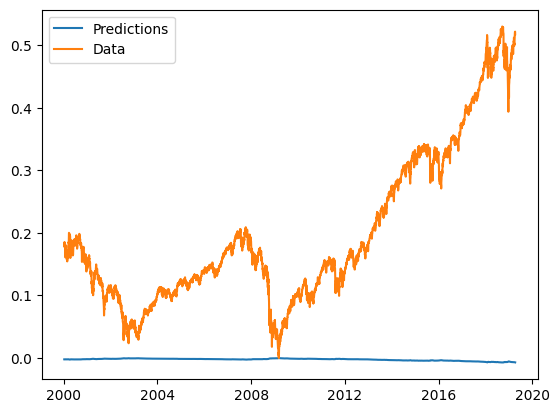

In [11]:
plt.plot(dates_train, predictions_train)
plt.plot(dates_train, y_train)
plt.legend(['Predictions', 'Data'])

In [18]:
x_train, y_train, predictions_train


(<tf.Tensor: shape=(4842, 5, 1), dtype=float32, numpy=
 array([[[0.18316083],
         [0.17003575],
         [0.17066847],
         [0.17098366],
         [0.17992659]],
 
        [[0.17003575],
         [0.17066847],
         [0.17098366],
         [0.17992659],
         [0.18372063]],
 
        [[0.17066847],
         [0.17098366],
         [0.17992659],
         [0.18372063],
         [0.17924213]],
 
        ...,
 
        [[0.50756687],
         [0.51527965],
         [0.5152914 ],
         [0.5167403 ],
         [0.51814926]],
 
        [[0.51527965],
         [0.5152914 ],
         [0.5167403 ],
         [0.51814926],
         [0.5212894 ]],
 
        [[0.5152914 ],
         [0.5167403 ],
         [0.51814926],
         [0.5212894 ],
         [0.52200216]]], dtype=float32)>,
 <tf.Tensor: shape=(4842,), dtype=float32, numpy=
 array([0.18372063, 0.17924213, 0.1777579 , ..., 0.5212894 , 0.52200216,
        0.51786935], dtype=float32)>,
 array([-0.00216187, -0.00215604, -0.00218758